In [1]:
import numpy as np
import os
import sys
import random
import torch
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path+"/models")
sys.path.append(module_path+"/train")
sys.path.append(module_path+"/datasets")

from datasets import train_test_random_split, load_dsprites, CustomDSpritesDataset
from entanglement_metric import entanglement_metric_factor_vae, entanglement_metric_beta_vae
from utils import latent_transversal
from beta_vae import Classifier

C:\Users\richi\Anaconda3\envs\python37\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\richi\Anaconda3\envs\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\richi\Anaconda3\envs\python37\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
device.type

'cuda'

In [3]:
dataset = load_dsprites("../datasets/dsprites.npz",False)

In [4]:
data_ = CustomDSpritesDataset(dataset)

In [5]:
#model_names = [f for f in os.listdir('trained_models') if f[-4:] =='.dat']
model_names = [f for f in os.listdir('trained_models') if f[-4:] =='.dat' and 'control' in f]
model_names

['controlvae_epoch50_lr1e2_Cmax10.dat',
 'controlvae_epoch50_lr1e2_Cmax12.dat',
 'controlvae_epoch50_lr1e2_Cmax8.dat']

In [6]:
def plot_loss(loss_lists, title):
    if not isinstance(loss_lists[0], list):
        loss_lists = [loss_lists]
    for loss_list in loss_lists:
        plt.plot(np.arange(1,len(loss_list)+1, 1), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training "+title)
    plt.show()

model 1: controlvae_epoch50_lr1e2_Cmax10.dat
[0.14333333333333334, 0.14333333333333334, 0.10333333333333333, 0.1, 0.12]
[[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
  [ 0.  22.6 39.2  0.   0.   0.   0.   0.   0.2  0.2]
  [ 0.  52.8  0.   0.   0.   0.   0.   0.   0.   0. ]
  [ 0.6  0.6 45.2  0.4  2.   0.8  0.8  0.2  3.8  4.4]
  [ 0.   0.   0.   0.   0.   0.   0.   0.  56.   0. ]
  [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  70.2]]]
Factor Vae metric: 
Accuracy: 0.878
Beta Vae metric: 
Accuracy: 0.788


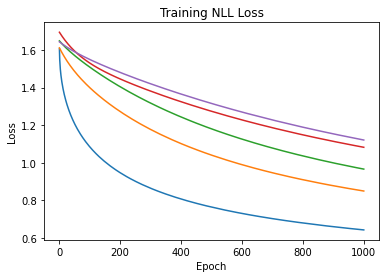

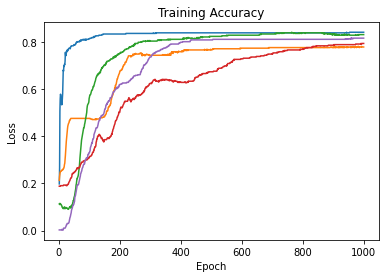

model 2: controlvae_epoch50_lr1e2_Cmax12.dat
[0.20333333333333334, 0.22, 0.21, 0.24, 0.15333333333333332]
[[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
  [ 0.  34.8  6.2  0.   0.  13.6  0.   0.   3.2  0. ]
  [ 0.   0.8  0.   0.   0.  59.   0.   0.   0.   0. ]
  [ 3.4 32.2  0.   6.6  0.6  0.2  0.4  2.8  0.2 17.4]
  [ 0.   0.  58.2  0.   0.   0.   0.   0.   0.   0. ]
  [ 0.   0.8  4.4  0.   0.   0.4  0.   0.  54.2  0.6]]]
Factor Vae metric: 
Accuracy: 0.7946666666666666
Beta Vae metric: 
Accuracy: 0.632


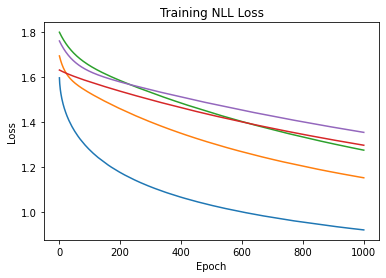

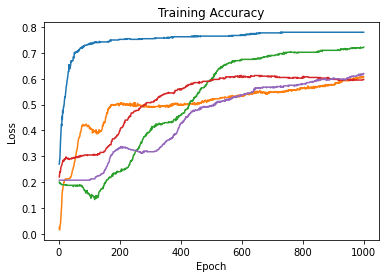

model 3: controlvae_epoch50_lr1e2_Cmax8.dat
[0.13666666666666666, 0.16333333333333333, 0.11666666666666667, 0.16, 0.17]
[[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
  [38.4  0.   0.   0.8  0.   0.   0.   0.  18.4  0. ]
  [ 5.2  0.   0.   0.   0.   0.   0.   0.  57.2  0. ]
  [40.6  0.8  0.8  4.6  6.6  0.   1.   1.6  3.4  1.6]
  [ 0.   0.   0.   0.  63.2  0.   0.   0.   0.   0. ]
  [ 0.   0.   0.  55.8  0.   0.   0.   0.   0.   0. ]]]
Factor Vae metric: 
Accuracy: 0.8506666666666667
Beta Vae metric: 
Accuracy: 0.7559999999999999


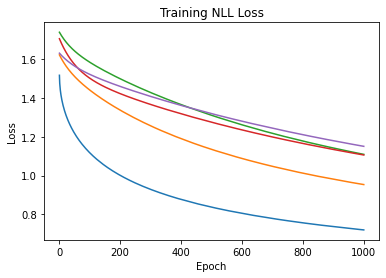

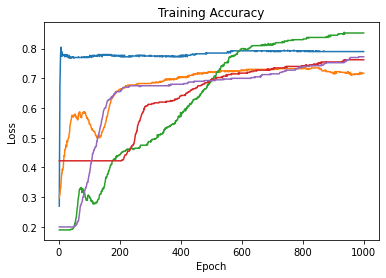

In [7]:
i=1
for name in model_names:
    model = torch.load('trained_models/'+name, map_location=device)
    print("model "+str(i)+": "+name)
    loss = entanglement_metric_factor_vae(model, data_, 300, 200, random_seeds=5, device = device)
    print("Factor Vae metric: ")
    print("Accuracy: "+str(1-loss))
    print("Beta Vae metric: ")
    classifier = Classifier().to(device)
    optimizer = torch.optim.Adagrad(classifier.parameters(), lr=1e-2)
    train_losses, train_accuracies, test_accuracy = entanglement_metric_beta_vae(model, classifier, optimizer, 1000,  data_, 500, 50, random_seeds=5, device = device)
    print("Accuracy: "+str(test_accuracy))
    plot_loss(train_losses, "NLL Loss")
    plot_loss(train_accuracies, "Accuracy")
    i+=1

In [ ]:
print(data_.factors_names)

In [ ]:
imgs = latent_transversal(model0,data_[10][0].float(),-3,3,10,7)

In [ ]:
for img in imgs:
    plt.imshow(torch.sigmoid(img.squeeze().detach()), cmap='Greys_r')
    plt.title("")
    plt.show()